# Handwirtten Digit Recognition 

#About Dataset
The dataset contains 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.
#Problem Statement
The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

##Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import tensorflow as tf
import keras as kr
import datetime
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

##Loading Data and Splitting Dataset into Training and Test set

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##Showing the images in Dataset

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i] ,cmap='binary')
    plt.title(y_train[i])
    plt.show()

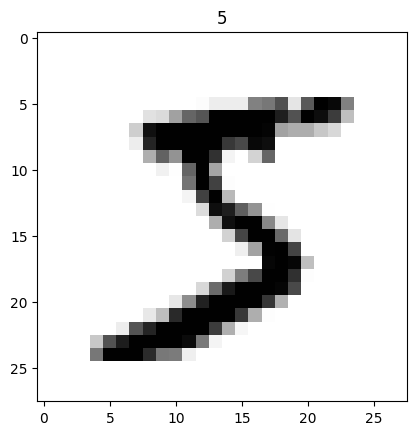

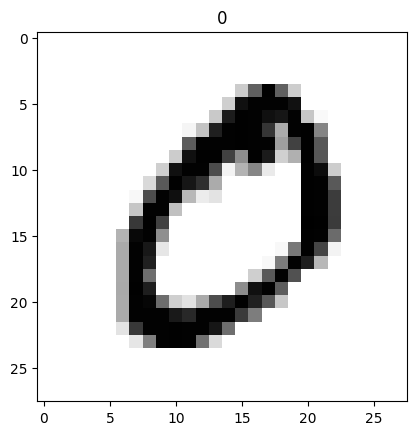

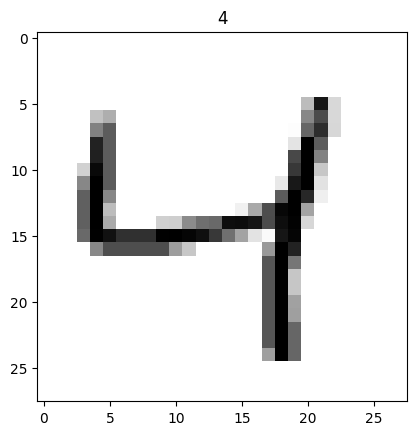

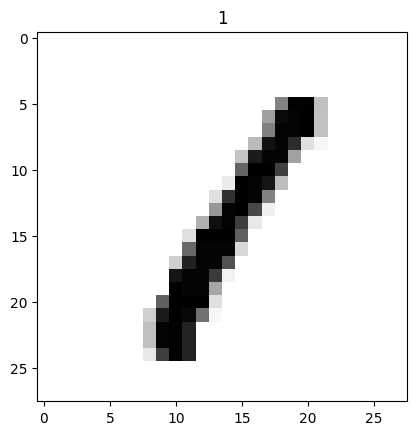

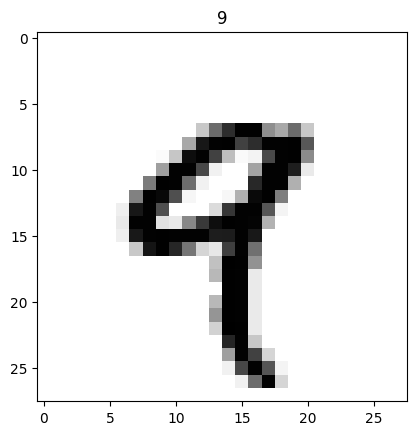

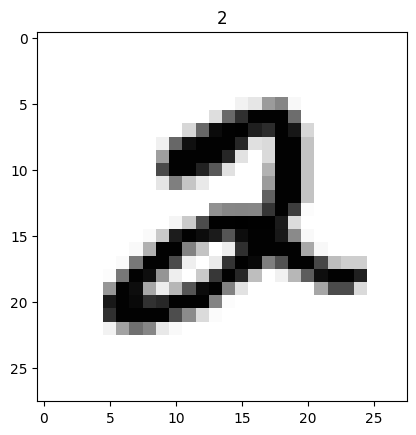

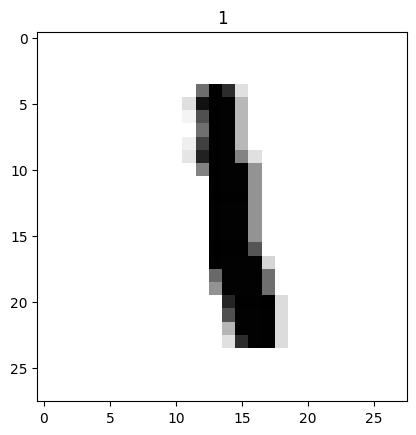

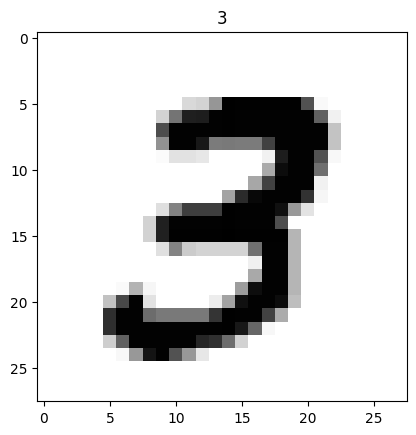

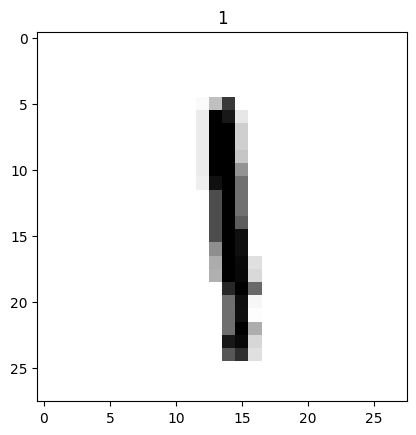

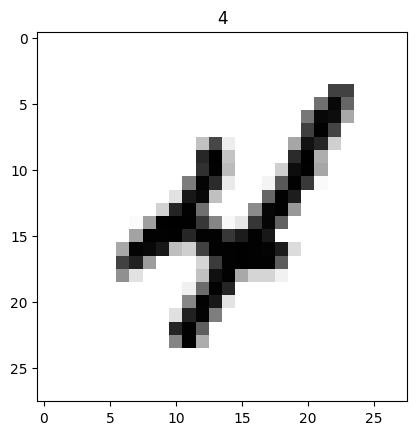

In [5]:
for i in range(10):
    plot_input_img(i)

##Pre-Processing Data

In [6]:
# REshape / expand the dimentions of images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
# Normalizing the image to [8,1] range
X_train_normalized = X_train/255
X_test_normalized = X_test/255

## Convolutional Neural Network 

In [8]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28,28,1),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

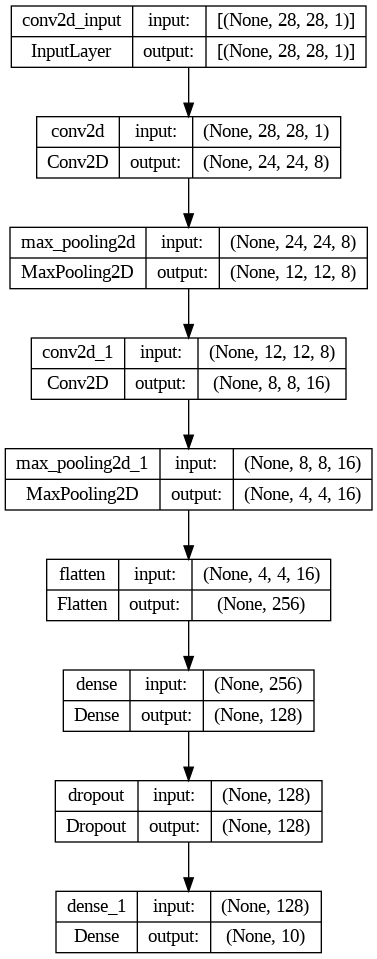

In [10]:
tf.keras.utils.plot_model(
    model,show_shapes=True,
    show_layer_names=True,)

## Compile the model

In [11]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

#Model Training

In [12]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    X_train_normalized,
    y_train,
    epochs=10,
    validation_data=(X_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 23s 7ms/step - loss: 0.2036 - accuracy: 0.9378 - val_loss: 0.0645 - val_accuracy: 0.9792
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0655 - accuracy: 0.9799 - val_loss: 0.0482 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0326 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0332 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0359 - val_accuracy

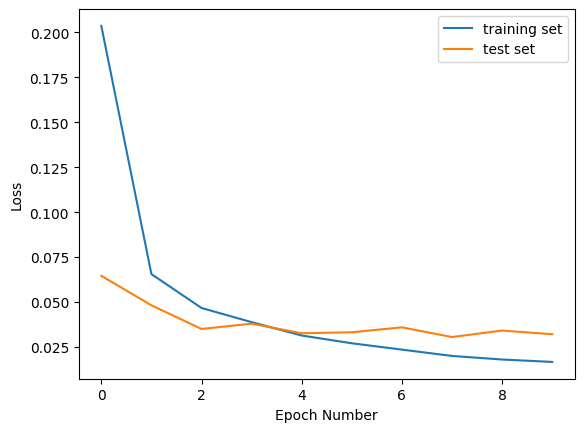

In [40]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

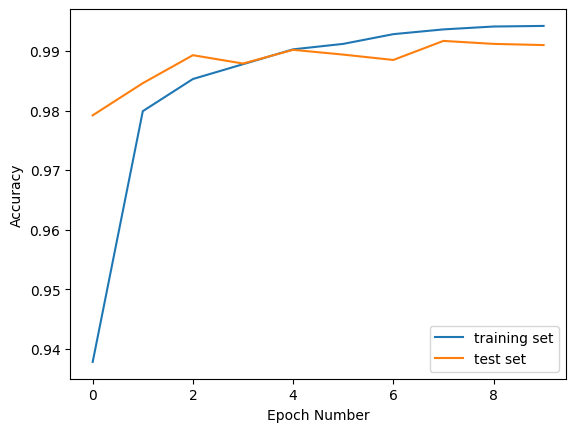

In [41]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [15]:
%%capture
train_loss, train_accuracy = model.evaluate(X_train_normalized, y_train)

In [16]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.009231791831552982
Training accuracy:  0.9970166683197021


### Test set accuracy

In [43]:
%%capture
validation_loss, validation_accuracy = model.evaluate(X_test_normalized, y_test)

In [44]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.0320417545735836
Validation accuracy:  0.9909999966621399


## Save the model

In [45]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [46]:
loaded_model = tf.keras.models.load_model(model_name)


## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [19]:
predictions_one_hot = model_S.predict([X_test_normalized])

313/313 [==============================] - 1s 2ms/step


In [20]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [21]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.402667e-11,1.687646e-11,1.512977e-06,2.295748e-07,2.463292e-15,4.022463e-13,1.944944e-19,9.999981e-01,1.222337e-09,7.967741e-08
1,1.228380e-09,8.817488e-07,9.999990e-01,1.121889e-11,6.518796e-12,6.180589e-16,1.787567e-07,6.869590e-14,4.362058e-10,1.436625e-14
2,1.175949e-08,9.996537e-01,8.512632e-07,1.057297e-08,2.711903e-04,4.542354e-08,3.619597e-07,6.823835e-05,5.296353e-06,3.454025e-07
3,9.999480e-01,2.794294e-12,1.300925e-06,2.016650e-09,5.448210e-08,2.159528e-07,4.978635e-05,1.726814e-10,5.028835e-07,6.139740e-08
4,5.856191e-12,3.015120e-11,1.929688e-11,1.065402e-12,9.999846e-01,2.785423e-13,1.683669e-10,3.956733e-09,5.358535e-10,1.535097e-05
...,...,...,...,...,...,...,...,...,...,...
9995,2.791324e-15,4.236917e-08,1.000000e+00,8.824731e-09,5.498366e-18,1.133497e-18,1.808176e-17,3.572687e-10,1.780221e-09,1.962189e-15
9996,1.918407e-11,2.748568e-11,1.049538e-09,1.000000e+00,9.501277e-16,1.670139e-08,2.930280e-19,1.268359e-12,4.143065e-12,1.130937e-09
9997,1.926291e-18,6.574430e-12,1.100870e-14,5.315911e-14,1.000000e+00,1.063521e-14,2.640678e-14,7.710313e-11,3.035804e-10,1.180415e-09
9998,9.340535e-09,1.258085e-14,2.434267e-11,1.317974e-06,1.992954e-11,9.999837e-01,5.040711e-07,2.332398e-13,1.455594e-05,2.873103e-10


In [22]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [23]:
print(predictions[0])

7


The First predicted  Element is 7 lets find out 

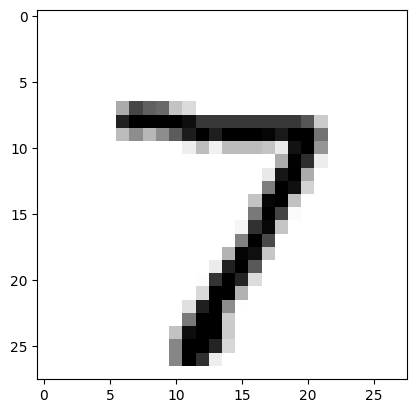

In [24]:
plt.imshow(X_test[0].reshape((28,28,1 )), cmap=plt.cm.binary)
plt.show()

<ipython-input-39-d5a6b352c469>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_cells, num_cells, plot_index + 1)


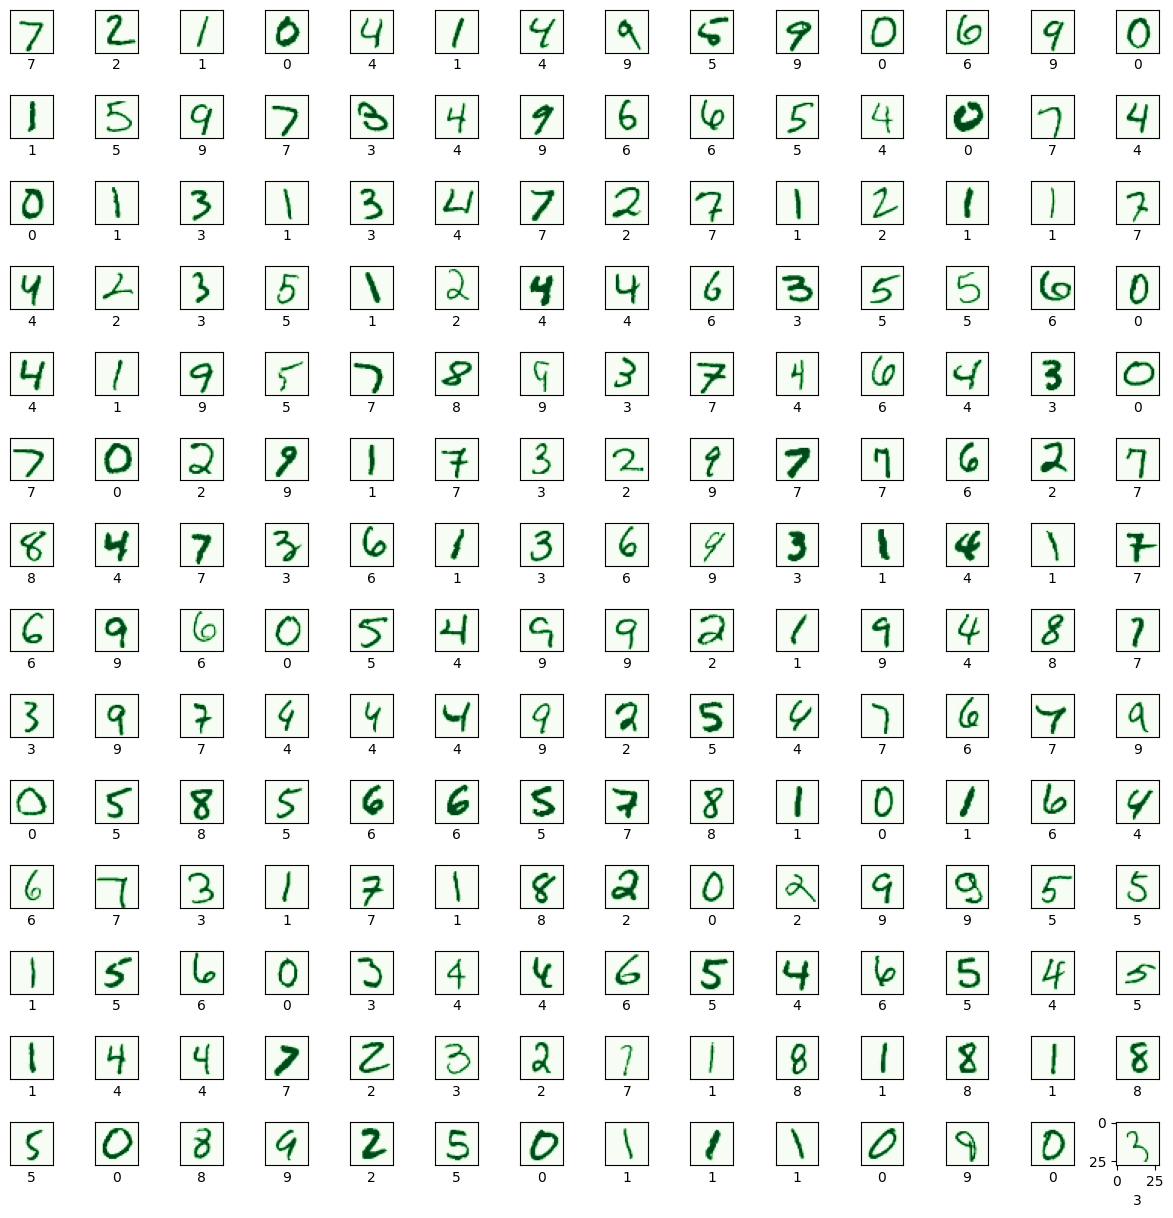

In [39]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens'if(predicted_label == y_test[plot_index]) else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(X_test[plot_index].reshape((28,28,1)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

##Confusion Matrix

Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number 5 with 3 or number 2 with 3.

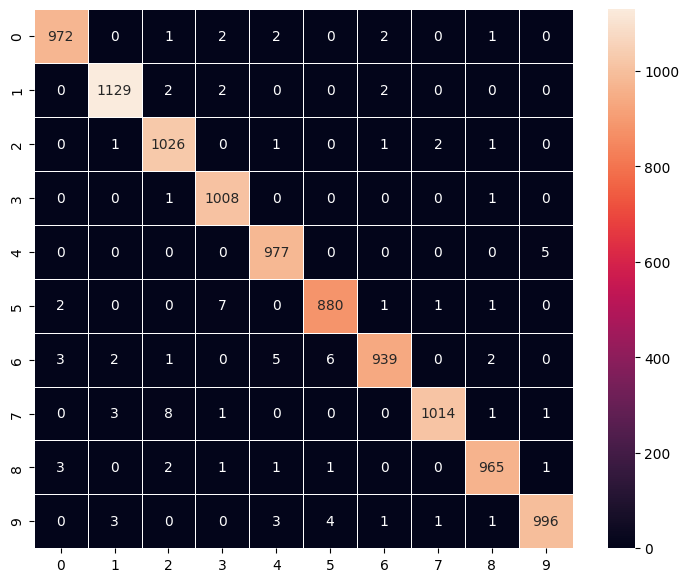

In [47]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

##Conclusion:
The Model gives 99% Accuracy.